In this project I will be using Data Analysis techniques to gain insight into __Titanic Dataset__ and Answer some interesting findings.

To Perform the Analysis I will be using Python version 3
 
Along with Packages
Numpy
Pandas
Matplotlib
Seaborn

In [5]:
# This command is used to import the required packages

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

>Now Lets import the dataset using pandas

In [6]:
titanic = pd.read_csv("train.csv") #This pandas fuction lets us import a data set

>We can take a look at the data set using head() function in python

In [7]:
titanic.head(10) # This shows the first 5 columns of the data set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Populating the interactive namespace from numpy and matplotlib


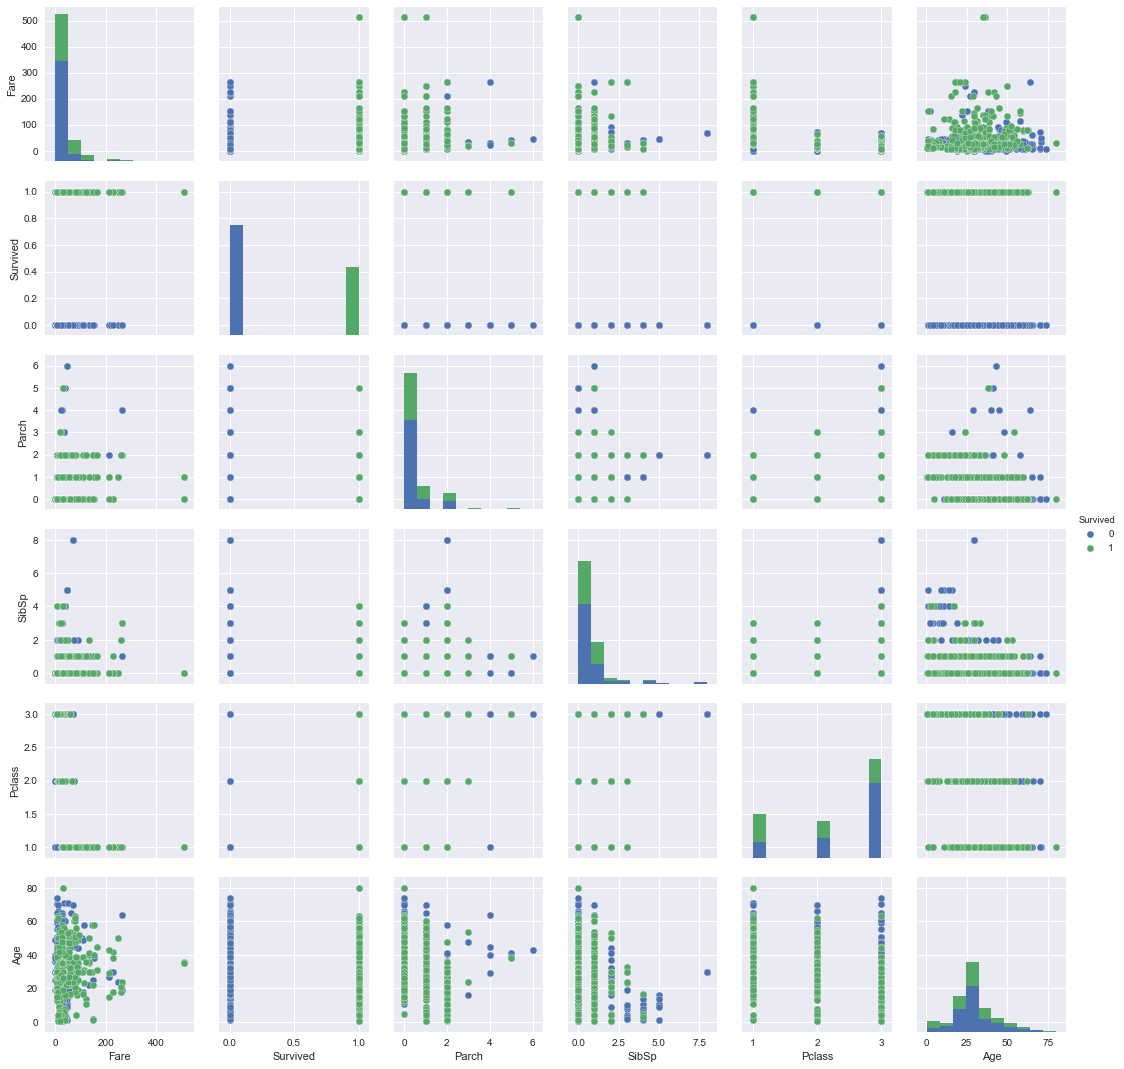

In [9]:
# using this command to display graph in notebook.
%pylab inline

# here some of the values in age column are missing so I am replacing those values with mean value Age.

# storing the data set with modified values in a differect variable so that we can perform other operations on missing values from Age column 
modified_titanic = pd.read_csv("train.csv") 
modified_titanic.loc[modified_titanic['Age'].isnull(),'Age'] = modified_titanic['Age'].mean()

# And I also see that lots of values for cabin numbers are missing but they are not of much significance so, 
# will not be using data from Cabin column. 

# using pairplot fuction from Seaborn package to see relationship between variables of our data set. 
sns.pairplot(data=modified_titanic[["Fare","Survived","Parch","SibSp","Pclass","Age","Sex"]],
             hue="Survived", dropna=True)

Some interesting findings can be seen from the pair plot.

We can see that more people died than survived.

We can see that there are more people without siblings, parents, children.

We can see that age of passengers is close normally distribution.

After taking a look at the dataset and pairplot. Some interesting questions that can be answered through the analysis

1. No of people survived.
2. Gender ratio of those survived 
3. relationship between passenger class and survival.
4. How does age effect the survival.
5. Does having any siblings, Children, parents effect the survival.

>No of people Survived

In [10]:
#We can answer this question by adding the elements in column "Survived" 

No_of_people_survived = titanic.loc[:,'Survived']

In [11]:
# Using the built in function sum() to add all the elements. 

print ("No of People survived is {} out of {}".format(No_of_people_survived.sum(), len(titanic.index)))

No of People survived is 342 out of 891


We can see that about __38%__ of people on board survived the tragic incident.

>Now lets see the gender ratio of people who have survived the disaster.

In [12]:
# we can achieve this by grouping the data using the built in groupby function

Gender_ratio = titanic.groupby('Sex')

In [13]:
print (Gender_ratio.sum()['Survived'])

Sex
female    233
male      109
Name: Survived, dtype: int64


Populating the interactive namespace from numpy and matplotlib


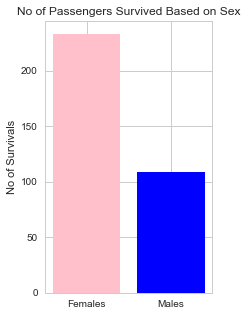

In [14]:
# using this command to display graph in notebook.
%pylab inline

# setting style
sns.set_style('whitegrid')
# figure dimensions
plt.figure(figsize=(3, 5))
# plotting a bar plot using bar function from matplotlib

objects = ('Females', 'Males')
y_pos = np.arange(len(objects))
performance = list(Gender_ratio.sum()['Survived'])
color_theme = ['pink','blue']
plt.bar(y_pos, performance, align='center', alpha=1,color=color_theme)
plt.xticks(y_pos, objects)
plt.ylabel('No of Survivals')
plt.title('No of Passengers Survived Based on Sex')

This answer's our second question

Here we can see that out of __342__ that survived, __233__ are females while __109__ are males.

But this does not mean that females have a greater chance of survival than males.

>I have an other question that might give more insight towards gender ratio of that survived.
- __No of male, female passengers on board.__

In [15]:
# we can use another useful pandas function value_counts to see the no of specific values in our column or data frame.

titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

The results are pretty interesting here, we can see that there are more males than females on board but in case of survival more females have survived than males.

which supports our statement that females have more chance of survival than males.
But corelation does not mean causation so, we cannot be entirely sure.

>Now lets see the relationship between passenger class and survival.

In [16]:
# Grouping data as per passenger class.

P_class = titanic.groupby('Pclass')

In [17]:
# using the grouped data to calculate survival counts using sum() function and then converting the data into numpy array.

Passenger_class_survived = np.array(P_class['Survived'].sum())
Passenger_class_survived

array([136,  87, 119], dtype=int64)

Here we can see that __136__ Upper class people have survived, __87__ Middle Class and __119__ Lower class.

We might think that the Upper class people have more chance of survival compared to other two groups. In order to check that we
will take a look at total no of people in each class.

In [18]:
# using the numpy array and value_counts() function to extract data from passenger class and converting 

Passenger_class_counts =((titanic['Pclass'].value_counts()))
Passenger_class_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

We can see that there are lot more Lower class people than Upper class. so, by taking the percentage of people survived from each class we can be sure.

In [19]:
# Both the passenger class, survival counts in those classes are in numpy arrays so, we can perform vectorized operations.

Passenger_class_counts_list = [216,184,491]
passenger_class_survival_percent = list((Passenger_class_survived/np.array(Passenger_class_counts_list))*100)

In [20]:
# printing the percentage of passengers survived from each class
passenger_class_survival_percent

[62.962962962962962, 47.282608695652172, 24.236252545824847]

> UpperClass: __63%__, MiddleClass: __47%__, LowerClass: __24%__

Populating the interactive namespace from numpy and matplotlib


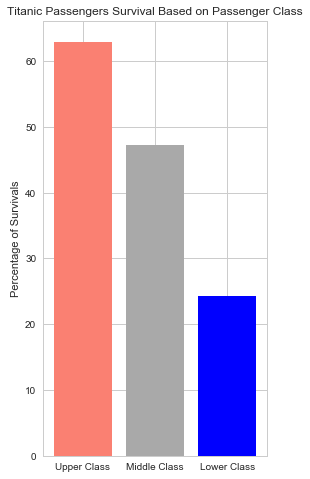

In [21]:
# using this command to display graph in notebook.
%pylab inline

# setting style
sns.set_style('whitegrid')
# figure dimensions
plt.figure(figsize=(4, 8))
# plotting a bar plot using bar function from matplotlib

# range of values for x axis
objects = ('Upper Class', 'Middle Class', 'Lower Class')
y_pos = np.arange(len(objects))
# setting color
color_theme = ['salmon','darkgray','blue']

# using the builtin bar fuction from matplot lib to produce a bar graph for percent of people survived from each class
plt.bar(y_pos,passenger_class_survival_percent,color=color_theme)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage of Survivals')
plt.title('Titanic Passengers Survival Based on Passenger Class')


Looking at the plot and survival percentage we can see that __UpperClass__ passengers have a __higher chance__ of survival.

So far we have see that Upeer class people have higher chance of survival and females have higer chance of survival.

Now lets see if you are a female and from upper class do you have more chance of survival?


In [22]:
titanic.groupby(['Sex','Pclass'])['Survived'].value_counts()

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

Here we can see that females from upper class and middle class have lot higher chance of survival than that of lower class

if we just count no of females survived from each class its pretty even but it greatly varies if we take the percentage.

__96%__ chance of survival for upper class female compared to __50%__ chance for lower class female passenger. 

Let's see the age group of people in each class.

for that we need to first study the ages of people on board.

In [23]:
# using the head function and taking a look at various values in Age column.

titanic.loc[:,'Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

From the above data we are missing some of the values for the Age column.

I will create a new dataset by removing those values.

This step can be performed at the start but then I found no use for the age then. but now as I am interested in ages of the passenger so, I want to clean my dataset.

In [24]:
# using the dropna function to remove all the nan values from the Age column and storing it into new variable

titanic_droped_nan_age =  titanic.dropna(subset = ["Age"], how='any')

In [25]:
# using describe function to get overall statistics

titanic_droped_nan_age[['Age']].describe()

,Age
count,714.000000
mean,29.699118
std,14.526497
min,0.420000
25%,20.125000
50%,28.000000
75%,38.000000
max,80.000000


Now that we have seen the data I want to group the data into 4 Age groups __0 - 20, 21 - 28, 29 - 38 and 39 - 80.__ I have simply taken this according to quartiles as we have equal no of people in each catogery.

In [26]:
Age_group_survival = {}
def Age_group_range(Lower_bound, Upper_bound, Age_group_name):
    '''
    '''
    dict_key = "Ages: {} - {}".format(Lower_bound,Upper_bound)
    age_group = titanic_droped_nan_age[(titanic_droped_nan_age.loc[:,"Age"] >= Lower_bound) & (titanic_droped_nan_age.loc[:,"Age"] <Upper_bound)]   
    Age_group_survival[dict_key] = age_group['Survived'].sum()
    print ("No of passengers survived for {} ({} - {}): {}".format(Age_group_name, Lower_bound, Upper_bound, Age_group_survival[dict_key]))
    print ("{} Survival with respect to Passenger class".format(Age_group_name))
    print (age_group.groupby("Pclass")['Survived'].sum())
    print ("No of Passengers in {}".format(Age_group_name))
    print (len(age_group.index))

In [27]:
# Creating different Age Groups using the fuction
Age_group_range(0, 21, "Age_group_1")

No of passengers survived for Age_group_1 (0 - 21): 82
Age_group_1 Survival with respect to Passenger class
Pclass
1    17
2    26
3    39
Name: Survived, dtype: int64
No of Passengers in Age_group_1
180


In [28]:
Age_group_range(21,29,"Age_group_2")

No of passengers survived for Age_group_2 (21 - 29): 66
Age_group_2 Survival with respect to Passenger class
Pclass
1    23
2    19
3    24
Name: Survived, dtype: int64
No of Passengers in Age_group_2
184


In [29]:
Age_group_range(29,39,"Age_group_3")

No of passengers survived for Age_group_3 (29 - 39): 76
Age_group_3 Survival with respect to Passenger class
Pclass
1    36
2    22
3    18
Name: Survived, dtype: int64
No of Passengers in Age_group_3
173


In [30]:
Age_group_range(39,81,"Age_group_4")

No of passengers survived for Age_group_4 (39 - 81): 66
Age_group_4 Survival with respect to Passenger class
Pclass
1    46
2    16
3     4
Name: Survived, dtype: int64
No of Passengers in Age_group_4
177


In [31]:
Age_group_range(60,81,"Age_group_5")

No of passengers survived for Age_group_5 (60 - 81): 7
Age_group_5 Survival with respect to Passenger class
Pclass
1    5
2    1
3    1
Name: Survived, dtype: int64
No of Passengers in Age_group_5
26


In [32]:
Age_group_range(70,81,"Age_group_6")

No of passengers survived for Age_group_6 (70 - 81): 1
Age_group_6 Survival with respect to Passenger class
Pclass
1    1
2    0
3    0
Name: Survived, dtype: int64
No of Passengers in Age_group_6
7


In [33]:
# Printing dictionary to look at No of survivals for different age groups
Age_group_survival

{'Ages: 0 - 21': 82,
 'Ages: 21 - 29': 66,
 'Ages: 29 - 39': 76,
 'Ages: 39 - 81': 66,
 'Ages: 60 - 81': 7,
 'Ages: 70 - 81': 1}

We can see the no of survivals in each age group!

> __How does Ages and Fare relate to each other__

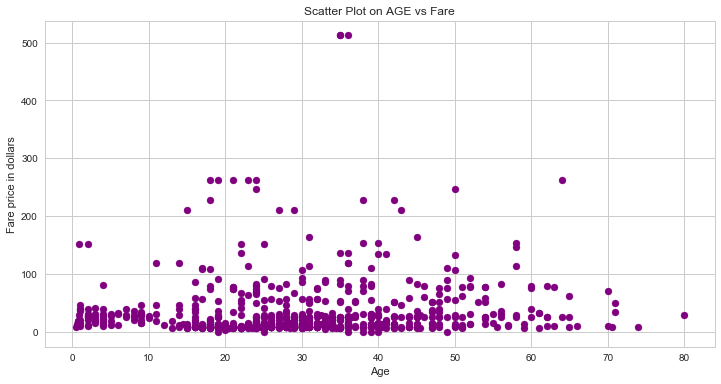

In [34]:
# for this I will make a scatter plot on Index (AGE AND FARE)


# setting style
sns.set_style('whitegrid')
# figure dimensions
plt.figure(figsize=(12, 6))
# plotting a Scatter plot using bar function from matplotlib

plt.scatter(titanic_droped_nan_age['Age'], titanic_droped_nan_age['Fare'], color = ['purple'])
plt.xlabel('Age')
plt.ylabel('Fare price in dollars')
plt.title('Scatter Plot on AGE vs Fare')


From the above plot we dont see much relationship between age of the passenger and fare of the passenger.

most of them seem to pay equal fare regard less the age. 

> __Does having siblings effect Survival__

In [35]:
# using groupby and pandas plot function to group data by SibSp and then summing up the Survived column and plotting it. 

siblings_survived = titanic.groupby("SibSp")['Survived'].sum()
siblings_survived

SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64

In [36]:
titanic.groupby("SibSp")['Survived'].value_counts()

SibSp  Survived
0      0           398
       1           210
1      1           112
       0            97
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

Here we can see that for the most part there is more chance of survival without any siblings/spouse

In [37]:
# Grouping data by Parch column

parents_survived = titanic.groupby("Parch")['Survived'].sum()
parents_survived

Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64

In [38]:
titanic.groupby("Parch")['Survived'].value_counts()

Parch  Survived
0      0           445
       1           233
1      1            65
       0            53
2      0            40
       1            40
3      1             3
       0             2
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

Here interestingly we can see that there is higher chance of survival for passengers with 1 or more children.

In [39]:
# grouping data by both Parch and SibSp columns.

siblings_parents_survival = titanic.groupby(["Parch","SibSp"])['Survived'].sum()
siblings_parents_survival

Parch  SibSp
0      0        163
       1         64
       2          4
       3          2
1      0         25
       1         34
       2          6
       3          0
       4          0
2      0         21
       1         12
       2          2
       3          2
       4          3
       5          0
       8          0
3      0          1
       1          1
       2          1
4      0          0
       1          0
5      0          0
       1          1
6      1          0
Name: Survived, dtype: int64

In [40]:
# this given the information on Passengers with siblings, parents there survival

titanic.groupby(["Parch","SibSp"])['Survived'].value_counts()

Parch  SibSp  Survived
0      0      0           374
              1           163
       1      1            64
              0            59
       2      0            12
              1             4
       3      1             2
1      0      1            25
              0            13
       1      1            34
              0            23
       2      1             6
              0             1
       3      0             7
       4      0             9
2      0      1            21
              0             8
       1      1            12
              0             7
       2      0             2
              1             2
       3      0             5
              1             2
       4      0             6
              1             3
       5      0             5
       8      0             7
3      0      1             1
       1      0             2
              1             1
       2      1             1
4      0      0             1
       1      0  

In [98]:
from sklearn import linear_model

# Logistic Regression

logreg = linear_model.LogisticRegression()

fit =logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

AttributeError: 'numpy.ndarray' object has no attribute 'score'

In [85]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier()
model.fit(X_train, Y_train)
model.score(X_train, Y_train)

0.80246913580246915

In [86]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)
model.score(X_train, Y_train)
model.

0.97081930415263751

In [88]:
X_train = titanic.drop(["Survived","PassengerId", "Name", "Cabin", "Ticket"],axis=1)



X_train['Sex'] = X_train['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
X_train["Embarked"] = X_train["Embarked"].fillna("S")
X_train["Age"] = X_train["Age"].fillna(33)
X_train['Embarked'] = X_train['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

Y_train = titanic["Survived"]

test_df = pd.read_csv("test.csv")
X_test  = test_df.drop(["PassengerId", "Name", "Cabin", "Ticket"],axis=1).copy()
X_test['Sex'] = X_test['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
X_test["Fare"] = X_test["Fare"].fillna(8.50)
X_test["Age"] = X_test["Age"].fillna(33)
X_test['Embarked'] = X_test['Embarked'].map( {'S': 1, 'C': 2, 'Q': 3} ).astype(int)

X_train.head()

#print (pd.isnull(X_test).sum())

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,2
2,3,1,26.0,0,0,7.9250,1
3,1,1,35.0,1,0,53.1000,1
4,3,0,35.0,0,0,8.0500,1


In [ ]:
from sklearn.cross_validation import train_test_split
X, y = titanic.iloc[:,:-1], titanic.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

The relationship with siblings and parents is tricky one we have more survivals with 0 sibiling, parents but we also lot more people with 0 sibilings/parents.

Here also we can see the same trend when combining those two variables and seeing the relationship with Survival. 

## Taking a Look back at the questions

#### __No of people survived?__

342 passengers have survived this tragic incident out of 892. in total that's 38% survival.
    
#### __Gender ratio of those survived?__

There are in total 577 males and 314 females on board. 
Out of 342 survivals 233 where females and 109 where males. That means 18% of males on board have survived, 74% of females on board have survived. 
    
With this it is possible that females have greater chance of survival than males. or it might be because females were evacuated first from the ship.
    
#### __Relationship between passenger class and survival.__

No of passengers on Board for each class
[upperClass : 216, MiddleClass: 184, LowerClass: 491]
No of passengers Survived for each class
[upperClass : 136, MiddleClass: 87, LowerClass: 119]
Percentage of survival/total in each class
[upperClass: 63,, MiddleClass: 47, LowerClass: 24]


from the results we can see that Upper class people have survived more than Lower even when there were more lower class people on board. This might be due to priority given during evacuation.
    
#### __How does age effect the survival.__

For this i first looked at quartiles for Age in the dataFrame and then calculated the no of survival.
By taking quartiles each age group is equally divided .
{'Ages: 0 - 20': 82,
 'Ages: 21 - 28': 66,
 'Ages: 29 - 38': 76,
 'Ages: 39 - 80': 66,
 'Ages: 60 - 80': 7,
 'Ages: 70 - 80': 1}

By looking at the results Age doesnot have much effect on survival. but here the Age group 1 and 4 have a wider spread that means there are fewer passengers in those age groups. Which is mainly prominent with age group 4.
So, I have checked the no of survival for ages 60 - 80 and found it to be 7 with total 26. thats 26% chance.
Further checking it for ages 70 - 80. only 1 passenger survived out of 7 that's 14% chance.
        
#### __Does having any siblings, Children, parents effect the survival.__

we can see that have siblings does not have much effect on survival. But in case of having a single parent/children the chance of survival is higher than other cases. and it is alos higher for passenger with 1 sibiling/spouse and 1 parent/children.

#### Conclusion

This dataset can further be studied to find more interesting facts and relations about the disaster. 

When answering some of the above question we have seen that females have more chance of survival and upper class people have more chance of survival. and we have also seen that Upper class female passengers have lot more chance of survival. these assumptions can be made certain if we have data on evacuation of passengers. That is did they evacuate females first. was priority given to upper class people during evacuation. data on location of rooms can help in seeing if people who stayed in top floor had more chance of survival. Were lower class people assigned rooms in the bottom part of ship which might take more to travel to top floor when evacuating.

What side of ship started evacuating first or did they evacuate from all sides these are some interesting that can be answered with more data.

Were passenger with children are given more priority?

This dataset can further be studied to find more interesting facts and relationship about the disaster.

__Reference__

- https://stackoverflow.com/
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html
- https://matplotlib.org/users/pyplot_tutorial.html